# Polynomial Linear Regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y dataset')

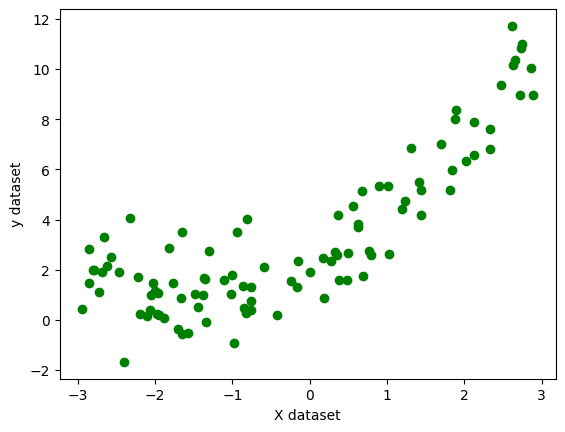

In [8]:
X = 6 * np.random.rand(100, 1) - 3
# HEER, substracting by 3 will create outlier
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# HERE, "0.5 * X**2 + 1.5*X + 2" is a quadratic equation and "np.random.randn(100, 1)" is a outlier

# quadratic equation used - y = 0.5 X^2 + 1.5*X + 2 + outliers

plt.scatter(X, y, c="g")
plt.xlabel("X dataset")
plt.ylabel("y dataset")

Applying Simple Linear Regression

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [35]:
regression_1.fit(X_train, y_train)

LinearRegression()

In [36]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.5269357393294396


Text(0, 0.5, 'Y Dataset')

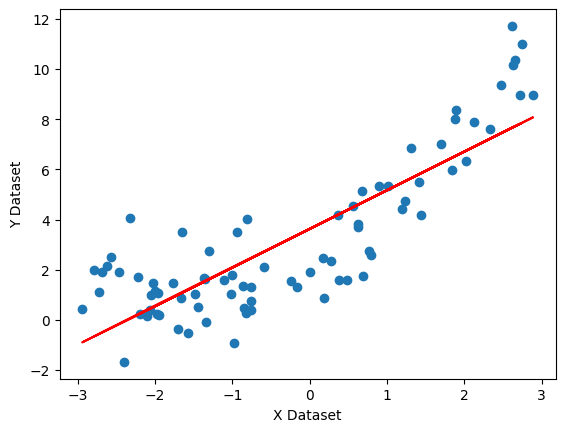

In [54]:
# Visualize
plt.plot(X_train, regression_1.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

Polynomial Transformation 

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
# Here include_bias=True, i.e - IN EQUATION [ h(x) = B₀ x⁰ + B₁ X¹ + B2 X²  ],  X⁰ should include.

In [56]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 
# for not applying train technique (fit_transform) features on test data, thats why transform is used.

In [57]:
X_train_poly
# [ Biase(x⁰) , X¹, X² ]  beacause polynomial degree is 2

array([[ 1.00000000e+00, -2.40495558e+00,  5.78381136e+00],
       [ 1.00000000e+00,  2.47043743e+00,  6.10306110e+00],
       [ 1.00000000e+00, -2.10774212e+00,  4.44257683e+00],
       [ 1.00000000e+00,  1.41168440e+00,  1.99285285e+00],
       [ 1.00000000e+00,  2.02157437e+00,  4.08676292e+00],
       [ 1.00000000e+00,  6.82283431e-01,  4.65510680e-01],
       [ 1.00000000e+00,  2.88920602e+00,  8.34751142e+00],
       [ 1.00000000e+00, -8.68616256e-01,  7.54494199e-01],
       [ 1.00000000e+00,  1.70490981e-01,  2.90671746e-02],
       [ 1.00000000e+00, -7.57323101e-01,  5.73538280e-01],
       [ 1.00000000e+00,  1.30501886e+00,  1.70307421e+00],
       [ 1.00000000e+00,  1.23544788e+00,  1.52633146e+00],
       [ 1.00000000e+00,  1.78797440e-01,  3.19685247e-02],
       [ 1.00000000e+00, -1.10343521e+00,  1.21756926e+00],
       [ 1.00000000e+00, -1.57923448e+00,  2.49398154e+00],
       [ 1.00000000e+00,  3.63477508e-01,  1.32115899e-01],
       [ 1.00000000e+00, -2.46241707e+00

In [58]:
X_test_poly

array([[ 1.        , -0.42815798,  0.18331925],
       [ 1.        ,  0.32717447,  0.10704314],
       [ 1.        ,  2.86399163,  8.20244804],
       [ 1.        ,  2.11983262,  4.49369034],
       [ 1.        , -1.8175759 ,  3.30358217],
       [ 1.        , -2.65908296,  7.07072217],
       [ 1.        , -2.86176926,  8.18972329],
       [ 1.        , -2.85746532,  8.16510808],
       [ 1.        , -1.88074015,  3.53718353],
       [ 1.        ,  1.81757421,  3.30357601],
       [ 1.        ,  0.35062745,  0.12293961],
       [ 1.        ,  2.73172541,  7.46232374],
       [ 1.        , -2.8088816 ,  7.88981582],
       [ 1.        ,  2.33622282,  5.45793706],
       [ 1.        ,  1.43525032,  2.05994349],
       [ 1.        , -0.15695504,  0.02463488],
       [ 1.        , -1.65580545,  2.74169168],
       [ 1.        ,  1.02835502,  1.05751404],
       [ 1.        , -1.38394709,  1.91530955],
       [ 1.        ,  0.5001358 ,  0.25013581]])

In [59]:
# Apply regression
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.8602563428392781


In [60]:
print(regression.coef_) # it will have three features
print(regression.intercept_) # it will have one value always

[[0.         1.58576269 0.48701579]]
[2.2365837]


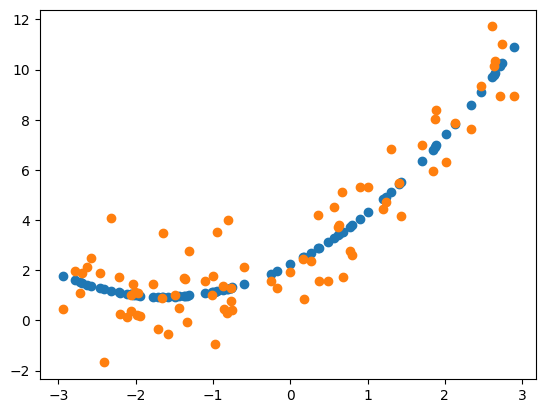

In [62]:
plt.scatter(X_train, regression.predict(X_train_poly)) # best fit line
plt.scatter(X_train, y_train)

In [ ]:
# FOR DEGREE = 3
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# It will have 4 features
X_train_poly

array([[ 1.00000000e+00, -2.40495558e+00,  5.78381136e+00,
        -1.39098094e+01],
       [ 1.00000000e+00,  2.47043743e+00,  6.10306110e+00,
         1.50772306e+01],
       [ 1.00000000e+00, -2.10774212e+00,  4.44257683e+00,
        -9.36380628e+00],
       [ 1.00000000e+00,  1.41168440e+00,  1.99285285e+00,
         2.81327928e+00],
       [ 1.00000000e+00,  2.02157437e+00,  4.08676292e+00,
         8.26169517e+00],
       [ 1.00000000e+00,  6.82283431e-01,  4.65510680e-01,
         3.17610223e-01],
       [ 1.00000000e+00,  2.88920602e+00,  8.34751142e+00,
         2.41176802e+01],
       [ 1.00000000e+00, -8.68616256e-01,  7.54494199e-01,
        -6.55365926e-01],
       [ 1.00000000e+00,  1.70490981e-01,  2.90671746e-02,
         4.95569110e-03],
       [ 1.00000000e+00, -7.57323101e-01,  5.73538280e-01,
        -4.34353789e-01],
       [ 1.00000000e+00,  1.30501886e+00,  1.70307421e+00,
         2.22254396e+00],
       [ 1.00000000e+00,  1.23544788e+00,  1.52633146e+00,
      

In [66]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.8601205769148109


In [68]:
#3 prediction of new dataset
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly # It will have 4 features

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

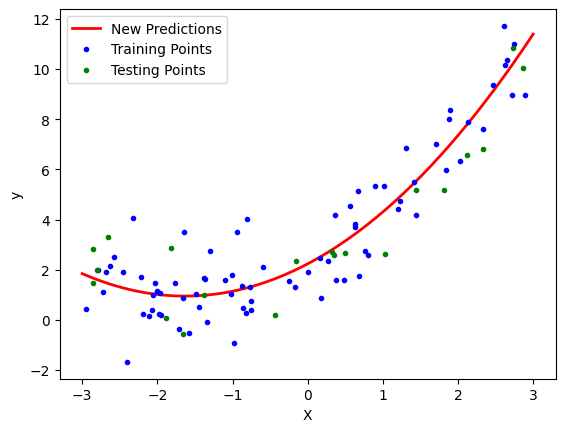

In [70]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="New Predictions")
plt.plot(X_train, y_train, "b.", label = "Training Points")
plt.plot(X_test, y_test, "g.", label="Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Generic method

In [84]:
from sklearn.pipeline import Pipeline

def poly_regression(degree, X_train, y_train, X_test, y_test):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train) # polynomial and fit of linear regression
    y_pred_new = poly_regression.predict(X_new)

    # Plotting prediction line

    plt.plot(X_new, y_pred_new, 'r', label="Degree" + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    plt.show()


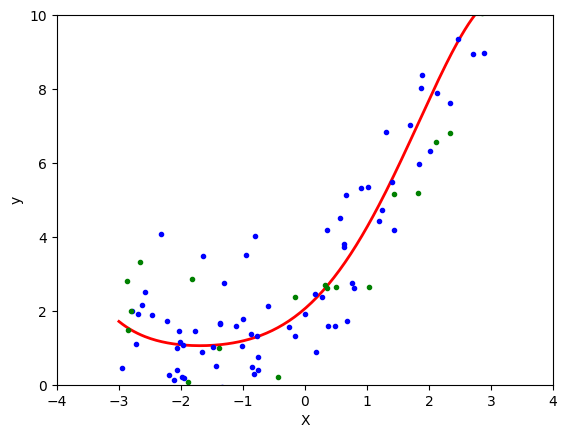

In [85]:
poly_regression(5, X_train, y_train, X_test, y_test)